In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random_walk_helper_functions as rwf

In [2]:
dir = "/home/meric/Desktop/josh_data_june/"
umap_mat_dir = dir + "times_umap_coords.tsv"
meta_data_dir = dir + "times_meta_data.tsv"

In [3]:
umap_df = pd.read_csv(umap_mat_dir, sep="\t",index_col=0)
umap_df = umap_df.transpose()
umap_df.columns = umap_df.columns.str.replace(' ','-', regex=True)

In [4]:
umap_df.head()

,BPK-12x-4NQO_AAACCTGCACCCAGTG-1,BPK-12x-4NQO_AAACCTGCAGCTTAAC-1,BPK-12x-4NQO_AAACCTGGTGTGCGTC-1,BPK-12x-4NQO_AAACCTGGTTGAACTC-1,BPK-12x-4NQO_AAACGGGAGGATGGTC-1,BPK-12x-4NQO_AAACGGGAGGGCTCTC-1,BPK-12x-4NQO_AAACGGGAGTAACCCT-1,BPK-12x-4NQO_AAACGGGCATGGGACA-1,BPK-12x-4NQO_AAACGGGGTCTGCAAT-1,BPK-12x-4NQO_AAACGGGTCAATCTCT-1,...,BPK-12x-vehicle_TTTGTCACAATGAAAC-1,BPK-12x-vehicle_TTTGTCACAGCTGTAT-1,BPK-12x-vehicle_TTTGTCAGTAGTACCT-1,BPK-12x-vehicle_TTTGTCAGTCAATGTC-1,BPK-12x-vehicle_TTTGTCAGTTCTCATT-1,BPK-12x-vehicle_TTTGTCAGTTCTGAAC-1,BPK-12x-vehicle_TTTGTCATCAGGATCT-1,BPK-12x-vehicle_TTTGTCATCATCATTC-1,BPK-12x-vehicle_TTTGTCATCATGCATG-1,BPK-12x-vehicle_TTTGTCATCTTGCATT-1
UMAP_1,-6.918063,-6.229528,-2.386837,0.452421,-0.408933,0.534103,0.081880,2.430138,-2.612102,-0.779424,...,-1.370669,-5.525952,-4.570516,-6.159027,-5.178401,-2.469830,2.158009,-9.850865,0.791062,-4.940183
UMAP_2,3.427666,4.032725,-4.201733,-5.875679,-10.238240,-9.888828,-9.367704,-3.338862,-4.696819,-6.475826,...,-9.005009,1.860541,-1.655411,1.837032,1.736538,-3.904411,-6.728771,-0.603518,-11.053839,-1.463177


In [5]:
meta_data = pd.read_csv(meta_data_dir, sep="\t",index_col=0)
meta_data.index = meta_data.index.str.replace(' ','-', regex=True)
meta_data.head()

,orig.ident,nCount_RNA,nFeature_RNA,percent.mt,RNA_snn_res.0.2,seurat_clusters,sample,RNA_snn_res.0.3,RNA_snn_res.2,cell_types
BPK-12x-4NQO_AAACCTGCACCCAGTG-1,midpoint_treated,2273,1042,4.047514,3.0,24,BPK 12x 4NQO,NaN,24,RS_B
BPK-12x-4NQO_AAACCTGCAGCTTAAC-1,midpoint_treated,2644,1036,3.933434,3.0,1,BPK 12x 4NQO,NaN,1,B
BPK-12x-4NQO_AAACCTGGTGTGCGTC-1,midpoint_treated,8506,2325,4.067717,9.0,23,BPK 12x 4NQO,NaN,23,cycEpi
BPK-12x-4NQO_AAACCTGGTTGAACTC-1,midpoint_treated,8249,2394,2.691235,2.0,5,BPK 12x 4NQO,NaN,5,ML
BPK-12x-4NQO_AAACGGGAGGATGGTC-1,midpoint_treated,4295,1505,2.281723,1.0,2,BPK 12x 4NQO,NaN,2,HSL


In [6]:
meta_column_dict = dict(zip(meta_data["cell_types"].index, meta_data["cell_types"].values))

In [7]:
source_cluster = [k for k, v in meta_column_dict.items() if v == "B"]
target_cluster = [k for k, v in meta_column_dict.items() if v == "LP"]

In [8]:
source_cluster[1:5]

['BPK-12x-4NQO_AAAGATGAGAGCCTAG-1',
 'BPK-12x-4NQO_AAAGATGTCGCTAGCG-1',
 'BPK-12x-4NQO_AAAGTAGGTTACGCGC-1',
 'BPK-12x-4NQO_AAATGCCCACAACGCC-1']

In [10]:
umap_matrix = umap_df.to_numpy()

# Get the cell names and size
#cols = meta_data.columns.values.tolist()
cols = umap_df.columns.values.tolist()
size = len(cols)

# Get index of the cells
source_ind = np.where(np.isin(cols,source_cluster[1:5]))
target_ind = np.where(np.isin(cols,target_cluster[1:5]))

# Generate the boolean arrays that mark source and target cells
source_indicator = np.full(size, False)
source_indicator[source_ind] = True
target_indicator = np.full(size, False)
target_indicator[target_ind] = True

In [11]:
sub_flow = rwf.generate_sub_flow(umap_matrix,source_indicator,target_indicator,10,1)

/home/meric/Desktop/single-cell-pathway-analysis/scripts/random_walk_helper_functions.py:126: RuntimeWarning: invalid value encountered in divide
  ratios = weights / outflow_sums


In [12]:
sub_flow_df = pd.DataFrame(sub_flow,cols)
sub_flow_df.columns = umap_df.columns
sub_flow_df.index = umap_df.columns
sub_flow_df.head()

,BPK-12x-4NQO_AAACCTGCACCCAGTG-1,BPK-12x-4NQO_AAACCTGCAGCTTAAC-1,BPK-12x-4NQO_AAACCTGGTGTGCGTC-1,BPK-12x-4NQO_AAACCTGGTTGAACTC-1,BPK-12x-4NQO_AAACGGGAGGATGGTC-1,BPK-12x-4NQO_AAACGGGAGGGCTCTC-1,BPK-12x-4NQO_AAACGGGAGTAACCCT-1,BPK-12x-4NQO_AAACGGGCATGGGACA-1,BPK-12x-4NQO_AAACGGGGTCTGCAAT-1,BPK-12x-4NQO_AAACGGGTCAATCTCT-1,...,BPK-12x-vehicle_TTTGTCACAATGAAAC-1,BPK-12x-vehicle_TTTGTCACAGCTGTAT-1,BPK-12x-vehicle_TTTGTCAGTAGTACCT-1,BPK-12x-vehicle_TTTGTCAGTCAATGTC-1,BPK-12x-vehicle_TTTGTCAGTTCTCATT-1,BPK-12x-vehicle_TTTGTCAGTTCTGAAC-1,BPK-12x-vehicle_TTTGTCATCAGGATCT-1,BPK-12x-vehicle_TTTGTCATCATCATTC-1,BPK-12x-vehicle_TTTGTCATCATGCATG-1,BPK-12x-vehicle_TTTGTCATCTTGCATT-1
BPK-12x-4NQO_AAACCTGCACCCAGTG-1,1.039694e-18,2.053509e-19,1.214217e-43,1.364620e-69,2.248104e-111,2.199734e-112,2.012663e-103,9.220785e-65,2.347832e-46,5.085307e-68,...,6.684403e-92,4.331552e-18,2.550538e-25,6.903617e-18,2.125828e-18,2.429797e-41,6.246022e-89,2.157014e-28,6.667734e-129,3.786269e-24
BPK-12x-4NQO_AAACCTGCAGCTTAAC-1,1.433483e-19,1.513292e-19,1.157663e-45,9.824796e-71,1.902180e-115,1.090994e-115,1.022611e-106,2.740120e-63,8.744278e-49,2.944057e-70,...,6.916680e-96,6.424094e-19,2.337803e-27,4.133058e-19,4.411173e-19,2.970841e-43,1.712374e-89,3.984918e-33,1.080800e-132,2.559326e-26
BPK-12x-4NQO_AAACCTGGTGTGCGTC-1,1.986082e-62,2.141008e-64,3.868974e-16,4.885352e-19,4.296963e-37,2.324448e-36,1.646960e-32,4.145120e-22,1.191198e-16,6.715460e-19,...,2.490855e-29,3.121019e-45,4.484375e-24,1.818107e-47,2.887272e-43,3.980178e-16,6.920253e-26,3.412059e-57,1.286364e-44,7.314112e-26
BPK-12x-4NQO_AAACCTGGTTGAACTC-1,1.811569e-95,1.751248e-96,1.060123e-25,1.060303e-18,1.309624e-33,7.282663e-31,8.568706e-29,5.733587e-20,3.798110e-26,4.677293e-21,...,7.560714e-30,2.819245e-72,3.596797e-43,3.551665e-76,3.236024e-69,2.488240e-26,4.921637e-20,3.157928e-92,4.702208e-37,2.530077e-46
BPK-12x-4NQO_AAACGGGAGGATGGTC-1,2.374428e-140,4.430902e-144,1.030446e-43,5.518566e-32,5.778415e-31,5.666525e-30,2.085280e-29,9.071170e-44,3.376007e-42,1.858936e-31,...,7.009692e-31,1.710209e-111,1.243539e-69,5.172282e-115,3.508995e-108,2.025046e-45,2.592264e-31,1.168361e-120,2.616413e-32,1.702042e-73


In [13]:
# Gets the pairs of cells sorted to the detected sub-flow
def get_sorted_pairs(sub_flow):
    flow_map = {}
    for i in range(len(sub_flow)):
        for j in range(len(sub_flow[i])):
            flow_map[(i, j)] = sub_flow[i, j]

    return sorted(flow_map.items(), key=lambda x:x[1], reverse=True)

In [14]:
pairs = get_sorted_pairs(sub_flow)

In [19]:
pairs[1:200]

[((11, 5901), 3.958849984816587e-12),
 ((11, 7250), 3.9391401450036185e-12),
 ((11, 5843), 3.8820900398244346e-12),
 ((11, 4737), 3.857023081497076e-12),
 ((11, 1960), 3.852274956952295e-12),
 ((11, 6843), 3.834372505046067e-12),
 ((11, 7551), 3.825125746389478e-12),
 ((11, 5122), 3.8150405263823304e-12),
 ((11, 5277), 3.764551435517813e-12),
 ((11, 2391), 3.751336205980183e-12),
 ((11, 6485), 3.733464281472472e-12),
 ((11, 6915), 3.727277939238887e-12),
 ((11, 5639), 3.725819460817301e-12),
 ((11, 7567), 3.696105276225661e-12),
 ((11, 5899), 3.663644913452352e-12),
 ((11, 7021), 3.6397807313811856e-12),
 ((11, 7426), 3.6325022655008184e-12),
 ((11, 5771), 3.6057968552537327e-12),
 ((11, 3556), 3.5711862439872436e-12),
 ((11, 7084), 3.5658510516268607e-12),
 ((11, 7419), 3.539877847033543e-12),
 ((11, 5729), 3.5325347010288555e-12),
 ((11, 6124), 3.5202070400279164e-12),
 ((11, 4849), 3.5153487287610756e-12),
 ((11, 8760), 3.4899672970386776e-12),
 ((11, 5336), 3.4888100882153618e-12),

In [280]:
len(pairs[0])

2

In [20]:
def plot_cells(selected_cells, umap_coords):
    sub_cell = umap_coords[umap_coords.index.isin(selected_cells)]
    plt.figure(figsize=(10, 10))
    ax = plt.axes()
    ax.scatter(umap_coords['UMAP_1'], umap_coords['UMAP_2'])
    # scatter warning points in red (c='r')
    ax.plot(sub_cell['UMAP_1'], sub_cell['UMAP_2'], 'o', c='r')
    plt.show()

In [21]:
umap_coords = umap_df.transpose()
umap_coords.head()

,UMAP_1,UMAP_2
BPK-12x-4NQO_AAACCTGCACCCAGTG-1,-6.918063,3.427666
BPK-12x-4NQO_AAACCTGCAGCTTAAC-1,-6.229528,4.032725
BPK-12x-4NQO_AAACCTGGTGTGCGTC-1,-2.386837,-4.201733
BPK-12x-4NQO_AAACCTGGTTGAACTC-1,0.452421,-5.875679
BPK-12x-4NQO_AAACGGGAGGATGGTC-1,-0.408933,-10.238240


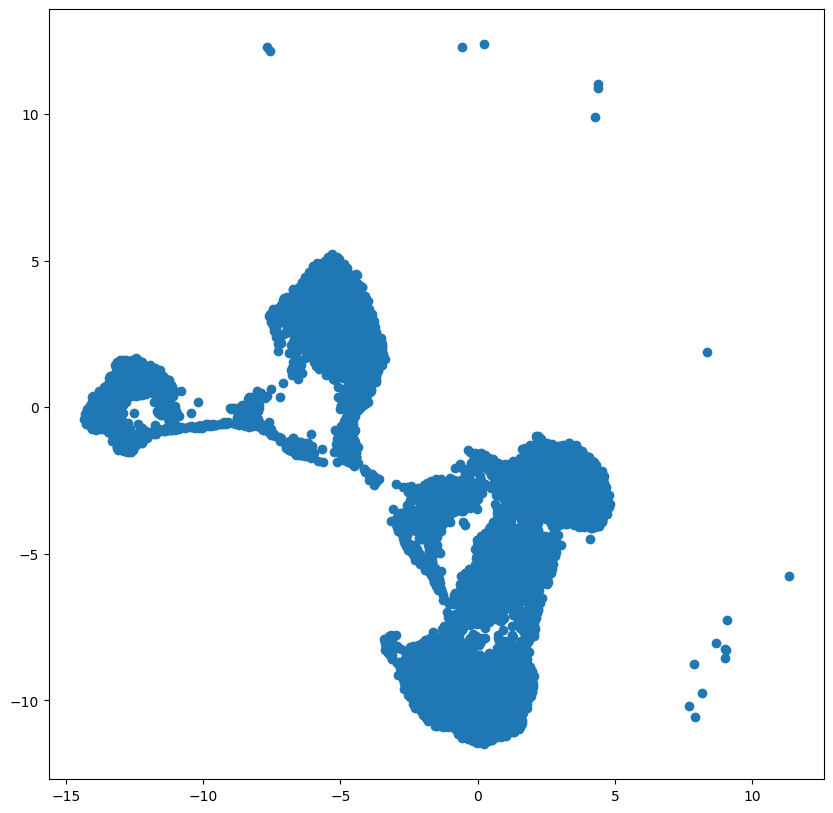

In [43]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(umap_coords['UMAP_1'], umap_coords['UMAP_2'])
# scatter warning points in red (c='r')
# ax.plot(sub_cell['UMAP_1'], sub_cell['UMAP_2'], 'o', c='r')
plt.show()

In [22]:
cell_index_dict = dict(zip(pd.DataFrame(np.where(meta_data.index)),meta_data.index))

In [69]:
cell_index_dict[999]

'BPK-12x-4NQO_CATATTCCAGGCGATA-1'

In [68]:
#cell_index_dict

{0: 'BPK-12x-4NQO_AAACCTGCACCCAGTG-1',
 1: 'BPK-12x-4NQO_AAACCTGCAGCTTAAC-1',
 2: 'BPK-12x-4NQO_AAACCTGGTGTGCGTC-1',
 3: 'BPK-12x-4NQO_AAACCTGGTTGAACTC-1',
 4: 'BPK-12x-4NQO_AAACGGGAGGATGGTC-1',
 5: 'BPK-12x-4NQO_AAACGGGAGGGCTCTC-1',
 6: 'BPK-12x-4NQO_AAACGGGAGTAACCCT-1',
 7: 'BPK-12x-4NQO_AAACGGGCATGGGACA-1',
 8: 'BPK-12x-4NQO_AAACGGGGTCTGCAAT-1',
 9: 'BPK-12x-4NQO_AAACGGGTCAATCTCT-1',
 10: 'BPK-12x-4NQO_AAACGGGTCAGGCCCA-1',
 11: 'BPK-12x-4NQO_AAAGATGAGAGCCTAG-1',
 12: 'BPK-12x-4NQO_AAAGATGAGATCCCGC-1',
 13: 'BPK-12x-4NQO_AAAGATGAGCGATGAC-1',
 14: 'BPK-12x-4NQO_AAAGATGAGTGGAGTC-1',
 15: 'BPK-12x-4NQO_AAAGATGCATGTTGAC-1',
 16: 'BPK-12x-4NQO_AAAGATGGTGCAACGA-1',
 17: 'BPK-12x-4NQO_AAAGATGTCGCTAGCG-1',
 18: 'BPK-12x-4NQO_AAAGATGTCTGCTGCT-1',
 19: 'BPK-12x-4NQO_AAAGATGTCTGTTGAG-1',
 20: 'BPK-12x-4NQO_AAAGCAACAAGGTTCT-1',
 21: 'BPK-12x-4NQO_AAAGCAACACGGCCAT-1',
 22: 'BPK-12x-4NQO_AAAGCAACATGCAACT-1',
 23: 'BPK-12x-4NQO_AAAGCAAGTCCAGTAT-1',
 24: 'BPK-12x-4NQO_AAAGCAATCATGTCCC-1',
 25: 'BPK-

In [287]:
cols2 = cols[200:250]

In [23]:
#i = 0
flow_score_df = pd.DataFrame([])
data = []
flow_score = []
for i in range(0,200):
    s = pairs[i][0][0]
    t = pairs[i][0][1]
    flow_score.append(pairs[i][1])
    # print(s)
    # print(i)
    # print(s,cell_index_dict[s],t,cell_index_dict[t],flow_score)
    # data.append([cell_index_dict[s],cell_index_dict[t],flow_score])
    data.append([cell_index_dict[s],cell_index_dict[t],pairs[i][1]])
    flow_score_df = flow_score_df.append(data)
    #flow_score_df = flow_score_df.append(data)
    #print(cell_index_dict[s],cell_index_dict[t],flow_score)

/tmp/ipykernel_217851/156673087.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flow_score_df = flow_score_df.append(data)
/tmp/ipykernel_217851/156673087.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flow_score_df = flow_score_df.append(data)
/tmp/ipykernel_217851/156673087.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flow_score_df = flow_score_df.append(data)
/tmp/ipykernel_217851/156673087.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  flow_score_df = flow_score_df.append(data)
/tmp/ipykernel_217851/156673087.py:14: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a fut

In [24]:
flow_score_df.shape

(20100, 3)

In [99]:
umap_coords.loc['BPK-12x-4NQO_ACTGTCCTCGGCCGAT-1']['UMAP_1']

-0.284963022396691

In [307]:
umap_coords

,UMAP_1,UMAP_2
BPK-12x-4NQO_AAACCTGCACCCAGTG-1,-6.918063,3.427666
BPK-12x-4NQO_AAACCTGCAGCTTAAC-1,-6.229528,4.032725
BPK-12x-4NQO_AAACCTGGTGTGCGTC-1,-2.386837,-4.201733
BPK-12x-4NQO_AAACCTGGTTGAACTC-1,0.452421,-5.875679
BPK-12x-4NQO_AAACGGGAGGATGGTC-1,-0.408933,-10.238240
...,...,...
BPK-12x-vehicle_TTTGTCAGTTCTGAAC-1,-2.469830,-3.904411
BPK-12x-vehicle_TTTGTCATCAGGATCT-1,2.158009,-6.728771
BPK-12x-vehicle_TTTGTCATCATCATTC-1,-9.850865,-0.603518
BPK-12x-vehicle_TTTGTCATCATGCATG-1,0.791062,-11.053839


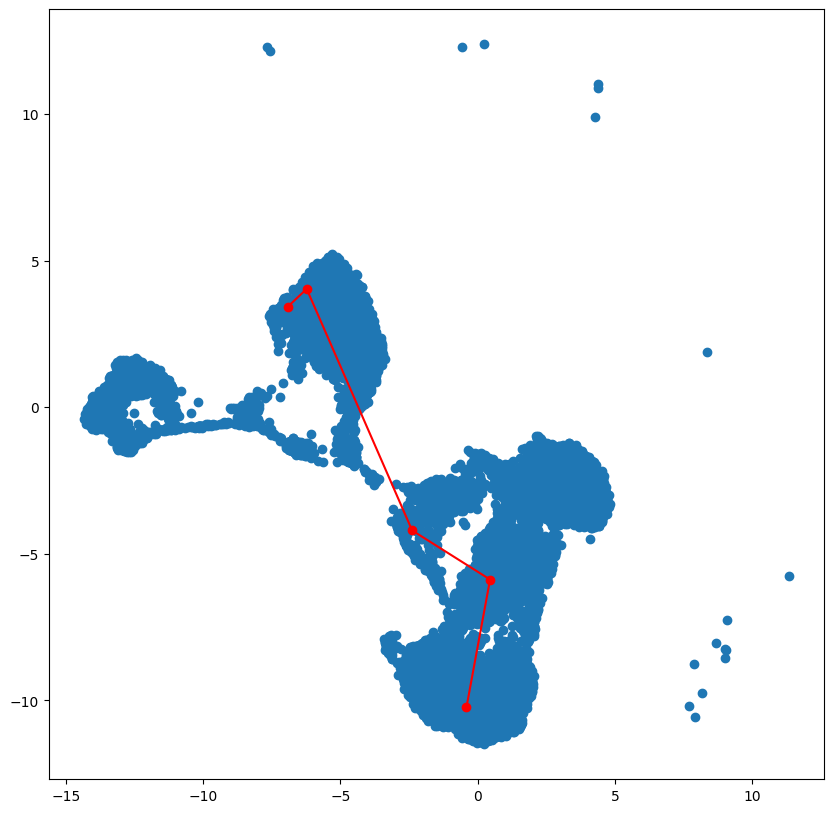

In [293]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(umap_coords['UMAP_1'], umap_coords['UMAP_2'])
# scatter warning points in red (c='r')
#ax.plot(umap_coords.loc['BPK-12x-4NQO_ACTGTCCTCGGCCGAT-1']['UMAP_1'], umap_coords.loc['BPK-12x-4NQO_ACTGTCCTCGGCCGAT-1']['UMAP_2'], 'ro-')
#
ax.plot(umap_sub['UMAP_1'],umap_sub['UMAP_2'],'ro-')
#ax.plot(umap_sub2['UMAP_1'],umap_sub2['UMAP_2'],'ro-')
plt.show()

In [ ]:
for key, value in dens.items():
    ax.scatter([table[key][0]], [table[key][1]], color=get_color_string(min(value * 10, 1)), alpha=1)

plt.show()

In [125]:
umap_sub = umap_coords.head()

In [201]:
umap_sub2 = umap_coords.tail()

In [27]:
flow_score_df

,0,1,2
0,BPK-12x-4NQO_AAAGATGAGAGCCTAG-1,BPK-12x-4NQO_GACTGCGGTGTTGAGG-1,3.967191e-12
0,BPK-12x-4NQO_AAAGATGAGAGCCTAG-1,BPK-12x-4NQO_GACTGCGGTGTTGAGG-1,3.967191e-12
1,BPK-12x-4NQO_AAAGATGAGAGCCTAG-1,BPK-12x-vehicle_CAGGTGCCAGCTTCGG-1,3.958850e-12
0,BPK-12x-4NQO_AAAGATGAGAGCCTAG-1,BPK-12x-4NQO_GACTGCGGTGTTGAGG-1,3.967191e-12
1,BPK-12x-4NQO_AAAGATGAGAGCCTAG-1,BPK-12x-vehicle_CAGGTGCCAGCTTCGG-1,3.958850e-12
...,...,...,...
195,BPK-12x-4NQO_AAAGATGAGAGCCTAG-1,BPK-12x-vehicle_TGAGGGACAGGACGTA-1,1.859694e-12
196,BPK-12x-4NQO_AAAGATGAGAGCCTAG-1,BPK-12x-vehicle_TAGTGGTGTACTTGAC-1,1.846596e-12
197,BPK-12x-vehicle_CTCGTCAGTTGTACAC-1,BPK-12x-4NQO_AACCGCGAGCGAGAAA-1,1.832453e-12
198,BPK-12x-4NQO_ACTTTCATCCCTAATT-1,BPK-12x-4NQO_AACCGCGAGCGAGAAA-1,1.832025e-12


In [224]:
#for row in flow_score_df.iterrows():
#    print(row)
    #print (row[1][0],row[1][1],row[1][2])
    #print(umap_coords.loc[row[1][0]]['UMAP_1'])

for i in range(0, len(flow_score_df)):
    #print(flow_score_df.iloc[i][0],umap_coords.loc[flow_score_df.iloc[i][0]]['UMAP_1'], flow_score_df.iloc[i][1],flow_score_df.iloc[i][2])
    #print(flow_score_df.iloc[i][0:2])
    print(umap_coords.loc[flow_score_df.iloc[i][0:2]]['UMAP_1'])

BPK-12x-4NQO_ACTGTCCTCGGCCGAT-1   -0.284963
BPK-12x-4NQO_ATAAGAGGTAGCAAAT-1   -0.336298
Name: UMAP_1, dtype: float64
BPK-12x-4NQO_ACTGTCCTCGGCCGAT-1   -0.284963
BPK-12x-4NQO_ATAAGAGGTAGCAAAT-1   -0.336298
Name: UMAP_1, dtype: float64
BPK-12x-4NQO_ACTGTCCTCGGCCGAT-1   -0.284963
BPK-12x-4NQO_TCACGAATCCTATTCA-1   -0.175599
Name: UMAP_1, dtype: float64
BPK-12x-4NQO_ACTGTCCTCGGCCGAT-1   -0.284963
BPK-12x-4NQO_ATAAGAGGTAGCAAAT-1   -0.336298
Name: UMAP_1, dtype: float64
BPK-12x-4NQO_ACTGTCCTCGGCCGAT-1   -0.284963
BPK-12x-4NQO_TCACGAATCCTATTCA-1   -0.175599
Name: UMAP_1, dtype: float64
BPK-12x-4NQO_ACTGTCCTCGGCCGAT-1   -0.284963
BPK-12x-4NQO_CTCGTACTCAGTTCGA-1   -0.136339
Name: UMAP_1, dtype: float64
BPK-12x-4NQO_ACTGTCCTCGGCCGAT-1   -0.284963
BPK-12x-4NQO_ATAAGAGGTAGCAAAT-1   -0.336298
Name: UMAP_1, dtype: float64
BPK-12x-4NQO_ACTGTCCTCGGCCGAT-1   -0.284963
BPK-12x-4NQO_TCACGAATCCTATTCA-1   -0.175599
Name: UMAP_1, dtype: float64
BPK-12x-4NQO_ACTGTCCTCGGCCGAT-1   -0.284963
BPK-12x-4NQO_CTCGTAC

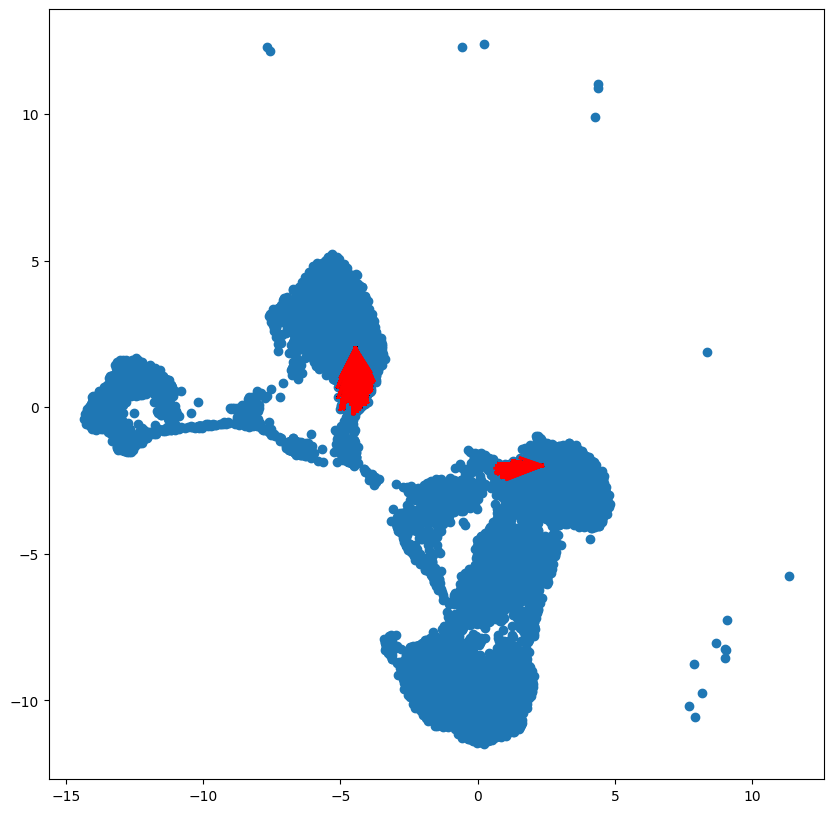

In [47]:
plt.figure(figsize=(10, 10))
ax = plt.axes()
ax.scatter(umap_coords['UMAP_1'], umap_coords['UMAP_2'])
# scatter warning points in red (c='r')
#ax.plot(umap_coords.loc['BPK-12x-4NQO_ACTGTCCTCGGCCGAT-1']['UMAP_1'], umap_coords.loc['BPK-12x-4NQO_ACTGTCCTCGGCCGAT-1']['UMAP_2'], 'ro-')
#
#ax.plot(umap_sub['UMAP_1'],umap_sub['UMAP_2'],'r')
#for key, value in dens.items():
#
#ax.scatter([table[key][0]], [table[key][1]], color=get_color_string(min(value * 10, 1)), alpha=1)

for i in range(0, len(flow_score_df)):
    # flow_score_df.iloc[i][2]
    #int(flow_score_df.iloc[i][2]*1000)
    #alpha= flow_score_df.iloc[i][2]*10
    ax.plot(umap_coords.loc[flow_score_df.iloc[i][0:2]]['UMAP_1'],umap_coords.loc[flow_score_df.iloc[i][0:2]]['UMAP_2'],'r-',linewidth=2, markersize=5)

plt.show()